# Description

evaluation:

- time of calculating answers
- for each missing answer time is doubled

## get dev data

In [1]:
import os
import sys
import shutil
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
sys.path.append("..")
from test_framework import comparison_test

In [3]:
datadir = '../data_sources/soccerway_data'
if not os.path.exists(datadir):
    os.makedirs(datadir)


put as much as you need of this to datadir

https://www.dropbox.com/sh/2ebfiuzau02ns6y/AABNPprCbIiqoS2tcVFUfm14a?dl=0

## evaluate solutions on dev data

#### create testinputs

In [4]:
M_INFO_FULL = pd.read_csv(datadir +  '/m_info.csv')

In [5]:
inputdir = 'inputs'
if os.path.exists(inputdir):
    shutil.rmtree(inputdir)
os.makedirs(inputdir)

In [6]:
def generate_input(input_size):
    pickle_file = '%s/%d-%f.pkl' % (inputdir,np.random.randint(10000000),input_size)
    M_INFO_FULL.sample(frac=input_size).reset_index()\
            .drop('index',axis=1).to_pickle(pickle_file)
    return {'data_pickle':pickle_file}

In [7]:
envdir = 'env_dir'
stagedir = 'staging'

In [8]:
datalocs = {k: '%s/%s.csv' % (datadir,k) for k in ['p_info','t_info','p_values','m_odds']}

data_dicts = {'ALL_DATA':{**datalocs,**{'staging_folder':stagedir}}}

input_sizes = [0.1,0.5,1]
reps = 5

input_set = {}
for data_name in data_dicts.keys():
    input_set[data_name] = {}
    for input_size in input_sizes:
        input_set[data_name][input_size] = [generate_input(input_size) 
                                            for _ in range(reps)]

In [9]:
WINDOWS = False #if false it assumes unix
timedata,out_dfs = comparison_test(data_dicts,input_set,
                                   envdir,stagedir,
                                   is_windows=WINDOWS,
                                  verbose=True)

base_solution


Starting ETL process
ETL process started
ETL process done
Starting cleanup process
cleanup process started
cleanup process done
ETL killed



In [10]:
shutil.rmtree(inputdir)

In [3]:
sample_output = [ 
          {'most-used-formation':None},
          {'number-of-players-with-no-games':None},
          {'player-with-highest-number-of-games':None},
          {'player-with-highest-number-of-games-where-his-team-didnt-concede':None}
          {'most-games-played-in-same-position-by-player':None},
          {'most-different-positions-by-player':None},
          {'most-different-formations-by-player':None},
          {'largest-odds-overcome-in-game':None},
          {'largest-height-difference-overcome-in-game':None},
          {'longest-time-in-days-between-two-games-for-player':None}
          {'biggest-value-difference':None},
          {'biggest-value-difference-upset':None}, # an upset means the unexpected team won
          {'biggest-value-difference-with-higher-odds':None},
          {'biggest-stadium-capacity-difference-upset':None}
          {'capacity-of-stadium-of-team-with-most-games':None},
          {'id-of-oldest-team-to-win-a-game':None},
          {'biggest-age-difference-between-teams-match-id':None},
          {'median-of-winning-team-average-age':None},
          {'median-of-favorite-team-average-age':None}, # favorite means has lower odds of winning
          {'median-of-underdog-team-average-age':None}, # underdog means has higher odds of winning
          {'team-with-most-wins-as-underdog':None},
          {'team-with-most-losses-as-favorite':None},
          {'team-with-lowest-average-odds-of-draw':None},
          {'position-with-highest-average-value':None},
          {'position-with-largest-average-height':None},
          {'position-with-largest-average-height':None}
    ]

In [15]:
similarity = []

for id1,solution1 in enumerate(list(out_dfs.keys())[:-1]):
    _df1 = out_dfs[solution1]
    solution2 = list(out_dfs.keys())[id1+1]
    _df2 = out_dfs[solution2]
    print('----------\n%s:\n' % solution1,_df1[_df1 != _df2].unstack().dropna())
    print('----------\n%s:\n' % solution2,_df2[_df1 != _df2].unstack().dropna())
    similarity.append({
        'solution1':solution1,
        'solution2':solution2,
        'similarity':(_df1 == _df2).mean().mean()
    })
#pd.DataFrame(similarity).sort_values('similarity')

In [13]:
timedf = pd.DataFrame(timedata).pivot_table(columns='solution',values='calc_time',
                                   index=['data_id','input_id'],aggfunc='median').reset_index()

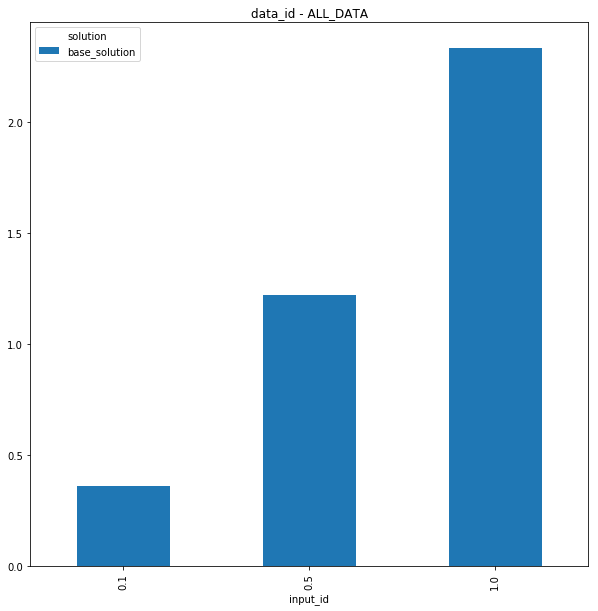

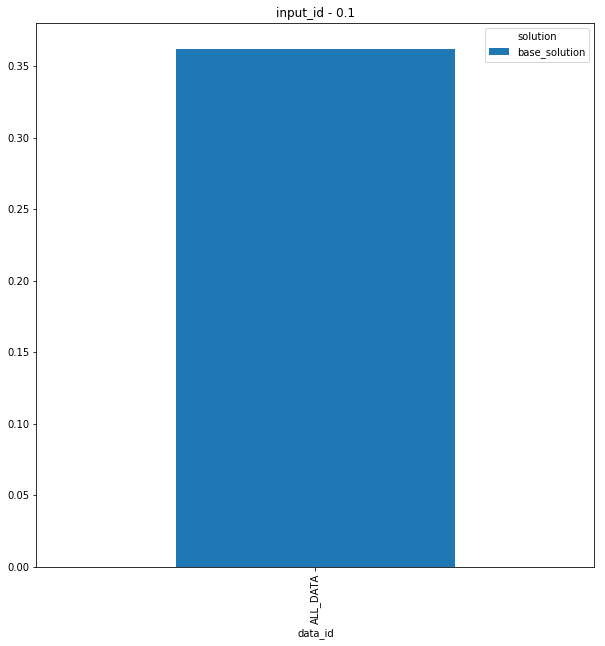

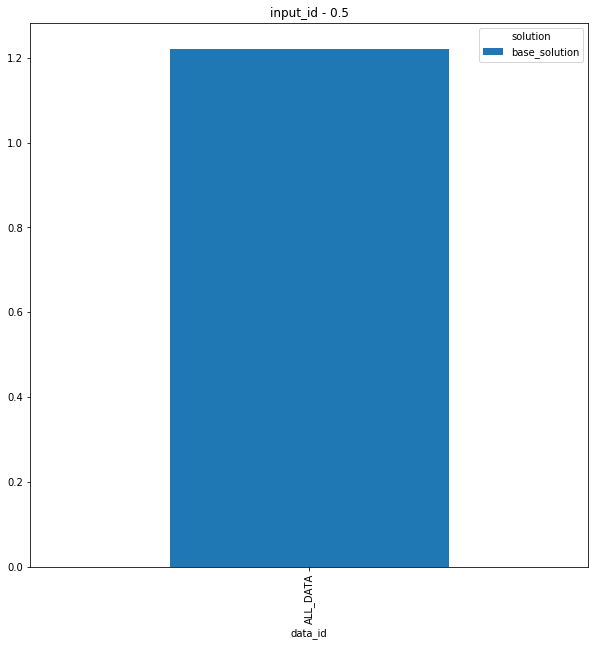

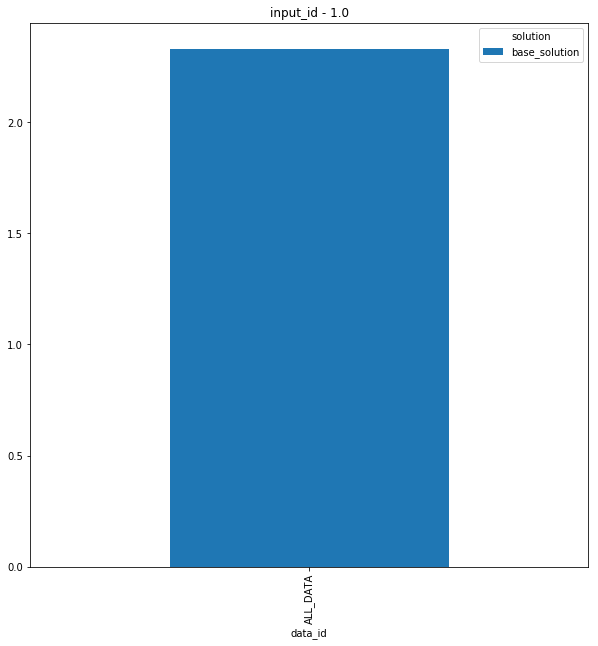

In [14]:
allgroups = ['data_id','input_id']
for basegroup in allgroups:
    remaingroup = [c for c in allgroups if c != basegroup]
    for _gname,_gdf in timedf.groupby(basegroup):
        _gdf.drop(basegroup,axis=1).groupby(remaingroup).median()\
        .plot(kind='bar',figsize=(10,10),title='%s - %s' % (str(basegroup),str(_gname)))